# Prétraitement des Données de Santé du Sommeil

Ce notebook effectue le prétraitement des données pour notre projet d'analyse de la santé du sommeil.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette('husl')

## 1. Chargement des Données

In [3]:
# Charger les données
df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
print('Dimensions du dataset:', df.shape)
df.head()

Dimensions du dataset: (15, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,7.5,8,45,6,Normal,Normal,70,8000,NaN
1,2,Female,34,Doctor,6.2,5,30,8,Overweight,High,85,5000,Insomnia
2,3,Male,45,Teacher,8.0,9,60,4,Normal,Normal,65,10000,NaN
3,4,Female,29,Nurse,5.8,4,20,9,Normal,High,90,4000,Sleep Apnea
4,5,Male,52,Manager,7.0,7,40,7,Overweight,High,75,6000,NaN


## 2. Exploration des Données

In [4]:
# Informations sur les colonnes
print('\nInformations sur les colonnes:')
df.info()


Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15 non-null     int64  
 1   Gender                   15 non-null     object 
 2   Age                      15 non-null     int64  
 3   Occupation               15 non-null     object 
 4   Sleep Duration           15 non-null     float64
 5   Quality of Sleep         15 non-null     int64  
 6   Physical Activity Level  15 non-null     int64  
 7   Stress Level             15 non-null     int64  
 8   BMI Category             15 non-null     object 
 9   Blood Pressure           15 non-null     object 
 10  Heart Rate               15 non-null     int64  
 11  Daily Steps              15 non-null     int64  
 12  Sleep Disorder           6 non-null      object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1

In [5]:
# Statistiques descriptives
print('\nStatistiques descriptives:')
df.describe()


Statistiques descriptives:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,37.466667,6.886667,6.533333,40.333333,6.600000,75.400000,7166.666667
std,4.472136,7.462924,0.825371,1.684665,11.567607,1.638815,7.725653,1707.825128
min,1.000000,27.000000,5.500000,4.000000,20.000000,4.000000,65.000000,4000.000000
25%,4.500000,32.000000,6.250000,5.000000,32.500000,5.500000,70.000000,6000.000000
50%,8.000000,36.000000,7.000000,7.000000,40.000000,7.000000,73.000000,7000.000000
75%,11.500000,43.000000,7.500000,8.000000,47.500000,8.000000,80.000000,8250.000000
max,15.000000,52.000000,8.200000,9.000000,60.000000,9.000000,90.000000,10000.000000


## 3. Nettoyage des Données

In [6]:
# Vérifier les valeurs manquantes
print('Valeurs manquantes par colonne:')
df.isnull().sum()

Valeurs manquantes par colonne:


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             9
dtype: int64

In [7]:
# Vérifier les doublons
print('\nNombre de doublons:', df.duplicated().sum())


Nombre de doublons: 0


## 4. Préparation des Features

In [8]:
# Convertir les variables catégorielles
df['Gender_num'] = (df['Gender'] == 'Male').astype(int)
df['Blood_Pressure_num'] = (df['Blood Pressure'] == 'High').astype(int)

## 5. Analyse des Corrélations

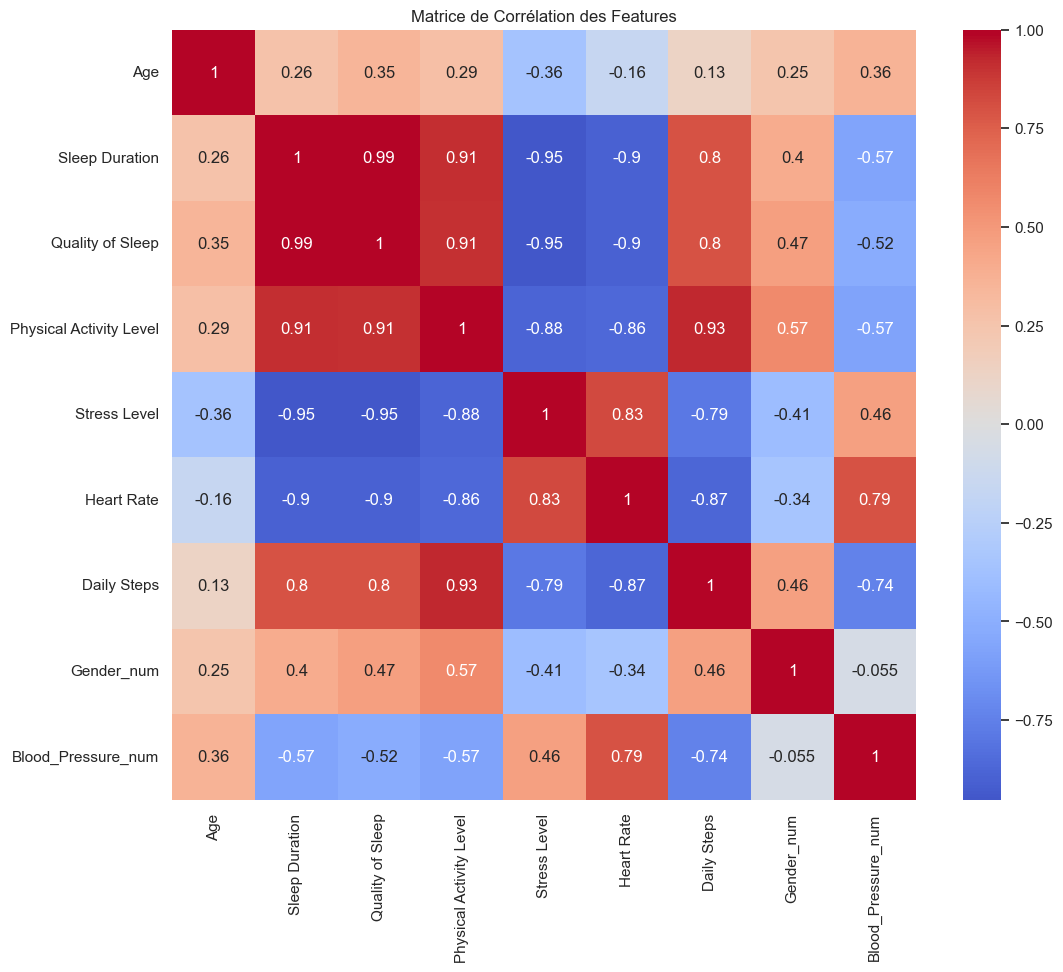

In [9]:
# Sélectionner les colonnes numériques pour la corrélation
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
               'Stress Level', 'Heart Rate', 'Daily Steps', 'Gender_num', 'Blood_Pressure_num']

# Calculer et afficher la matrice de corrélation
correlation = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation des Features')
plt.show()

## 6. Sauvegarde des Données Prétraitées

In [10]:
# Sauvegarder les données prétraitées
df.to_csv('../data/sleep_data_processed.csv', index=False)
print('Données prétraitées sauvegardées avec succès!')

Données prétraitées sauvegardées avec succès!
